# Markov

This notebook shows how to **discretize AR(1) processes** with **consav.markov**:

# Setup

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
import ipywidgets as widgets

# load the module
from consav import markov

# Simulation function

In [2]:
@nb.njit
def simulate(grid,trans_cumsum,ergodic_cumsum,simT,simN,eps_ergodic,eps):
    
    # a. allocate
    y = np.zeros((simT,simN))
    k = np.zeros((simT,simN),dtype=np.int_)
    
    # b. simulate
    for t in range(simT):
        for i in range(simN):
            
            # i. lag
            if t == 0:
                k_lag = markov.choice(eps_ergodic[i],ergodic_cumsum)
            else:
                k_lag = k[t-1,i]
            
            # ii. update
            k[t,i] = markov.choice(eps[t,i],trans_cumsum[k_lag,:])
            
            # iii. value
            y[t,i] = grid[k[t,i]]
    
    return k,y

# Showcase function

In [3]:
def showcase(grid,trans,ergodic,trans_cumsum,ergodic_cumsum):
    
    # a. transition matrix
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    h = ax.matshow(trans);
    #fig.colorbar(h)

    # b. transition probabilities
    fig = plt.figure(figsize=(12,4))

    ax = fig.add_subplot(1,2,1)
    for k in [0,n//2,n-1]: 
        ax.plot(grid,trans[k,:],'-o',label=f'k = {k}')
    ax.set_title('pdf')
    ax.legend(frameon=True)

    ax = fig.add_subplot(1,2,2)
    for k in [0,n//2,n-1]: 
        ax.plot(grid,trans_cumsum[k,:],'-o',label=f'k = {k}')
    ax.set_title('cdf');

    # c. ergodic
    fig = plt.figure(figsize=(12,4))

    ax = fig.add_subplot(1,2,1)
    ax.plot(grid,ergodic,'-o')
    ax.set_title('pdf')

    ax = fig.add_subplot(1,2,2)
    ax.plot(grid,ergodic_cumsum,'-o')
    ax.set_title('cdf');
    
    plt.show()
    
    # d. simulate
    np.random.seed(1917)
    
    simT = 100
    simN = 100_000

    eps_ergodic = np.random.uniform(0,1,size=simN)
    eps = np.random.uniform(0,1,size=(simT,simN))

    k,y = simulate(grid,trans_cumsum,ergodic_cumsum,simT,simN,eps_ergodic,eps)      
    
    print(f'simualated ergodic distribution:')
    for i in range(n):
        print(f' {np.mean(k==i):.3f} [theoretical = {ergodic[i]:.3f}]')
    
    return k,y

# Tauchen - normal

$$y_t = \rho y_{t-1} + \epsilon_t,\,\,\,\epsilon_t \sim \mathcal{N} \left(\mu,\sigma\right)$$

In [4]:
mu = 0.01
sigma = 0.1
rho = 0.98
n = 21

In [5]:
grid,trans,ergodic,trans_cumsum,ergodic_cumsum = markov.tauchen(mu=mu,sigma=sigma,rho=rho,n=n)

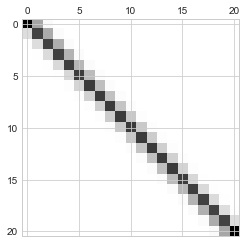

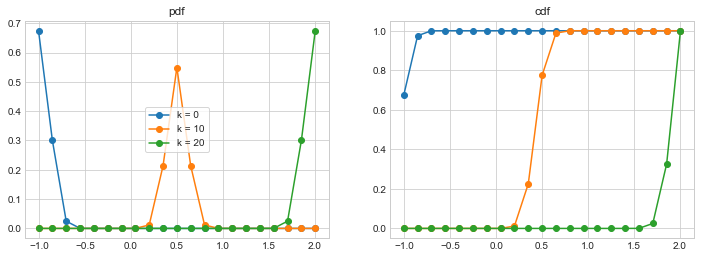

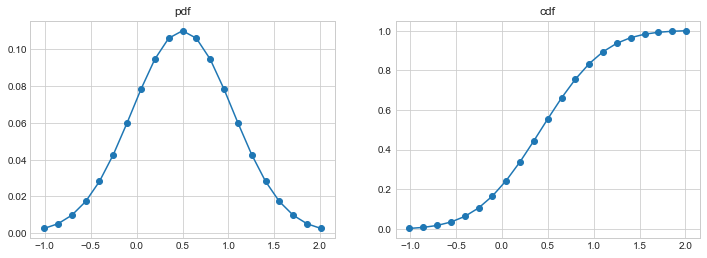

simualated ergodic distribution:
 0.003 [theoretical = 0.003]
 0.005 [theoretical = 0.005]
 0.010 [theoretical = 0.010]
 0.017 [theoretical = 0.017]
 0.028 [theoretical = 0.028]
 0.043 [theoretical = 0.043]
 0.060 [theoretical = 0.060]
 0.078 [theoretical = 0.078]
 0.095 [theoretical = 0.095]
 0.106 [theoretical = 0.106]
 0.110 [theoretical = 0.110]
 0.106 [theoretical = 0.106]
 0.095 [theoretical = 0.095]
 0.078 [theoretical = 0.078]
 0.060 [theoretical = 0.060]
 0.043 [theoretical = 0.043]
 0.028 [theoretical = 0.028]
 0.017 [theoretical = 0.017]
 0.010 [theoretical = 0.010]
 0.005 [theoretical = 0.005]
 0.003 [theoretical = 0.003]


In [6]:
k,y = showcase(grid,trans,ergodic,trans_cumsum,ergodic_cumsum)

In [7]:
print(f'mean(y) = {np.mean(y):.4f} [mu/(1-rho) = {mu/(1-rho):.3f}]')
print(f'std(y)  = {np.std(y):.4f} [sqrt(sigma**2/(1-rho^2)) = {np.sqrt(sigma**2/(1-rho**2)):.3f}]')

mean(y) = 0.4993 [mu/(1-rho) = 0.500]
std(y)  = 0.5390 [sqrt(sigma**2/(1-rho^2)) = 0.503]


# Rouwenhorst - normal

$$y_t = \rho y_{t-1} + \epsilon_t,\,\,\,\epsilon_t \sim \mathcal{N} \left(\mu,\sigma\right)$$

In [8]:
mu = 0.01
sigma = 0.1
rho = 0.98
n = 21

In [9]:
grid,trans,ergodic,trans_cumsum,ergodic_cumsum = markov.rouwenhorst(mu=mu,sigma=sigma,rho=rho,n=n)

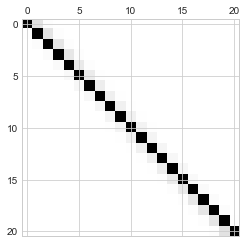

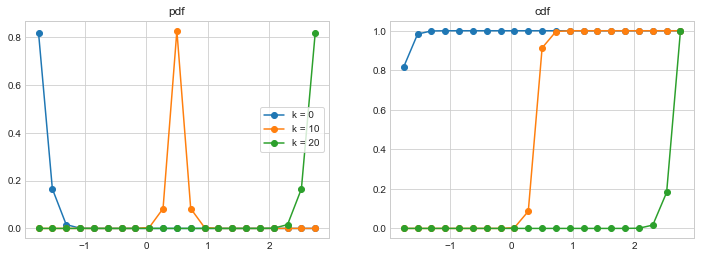

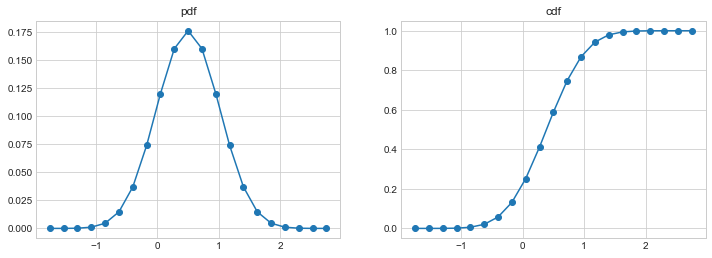

simualated ergodic distribution:
 0.000 [theoretical = 0.000]
 0.000 [theoretical = 0.000]
 0.000 [theoretical = 0.000]
 0.001 [theoretical = 0.001]
 0.005 [theoretical = 0.005]
 0.015 [theoretical = 0.015]
 0.037 [theoretical = 0.037]
 0.074 [theoretical = 0.074]
 0.120 [theoretical = 0.120]
 0.160 [theoretical = 0.160]
 0.176 [theoretical = 0.176]
 0.160 [theoretical = 0.160]
 0.120 [theoretical = 0.120]
 0.074 [theoretical = 0.074]
 0.037 [theoretical = 0.037]
 0.015 [theoretical = 0.015]
 0.005 [theoretical = 0.005]
 0.001 [theoretical = 0.001]
 0.000 [theoretical = 0.000]
 0.000 [theoretical = 0.000]
 0.000 [theoretical = 0.000]


In [10]:
k,y = showcase(grid,trans,ergodic,trans_cumsum,ergodic_cumsum)

In [11]:
print(f'mean(y) = {np.mean(y):.4f} [mu/(1-rho) = {mu/(1-rho):.3f}]')
print(f'std(y)  = {np.std(y):.4f} [sqrt(sigma**2/(1-rho^2)) = {np.sqrt(sigma**2/(1-rho**2)):.3f}]')

mean(y) = 0.4998 [mu/(1-rho) = 0.500]
std(y)  = 0.5031 [sqrt(sigma**2/(1-rho^2)) = 0.503]


# Rouwenhorst - log-normal

$$\log(y_t) = \rho \log(y_{t-1}) + \epsilon_t,\,\,\,\epsilon_t \sim \mathcal{N} \left(\mu,\sigma\right)$$

where $\mu$ is chosen to ensure $\mathbb{E}[y_t] = 1$. 

In [12]:
sigma = 0.1
rho = 0.98
n = 21

In [13]:
grid,trans,ergodic,trans_cumsum,ergodic_cumsum = markov.log_rouwenhorst(sigma=sigma,rho=rho,n=n)

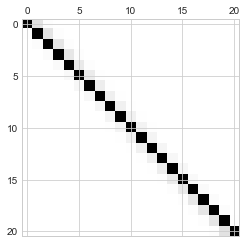

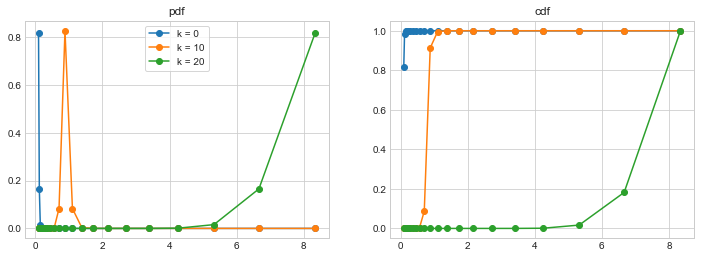

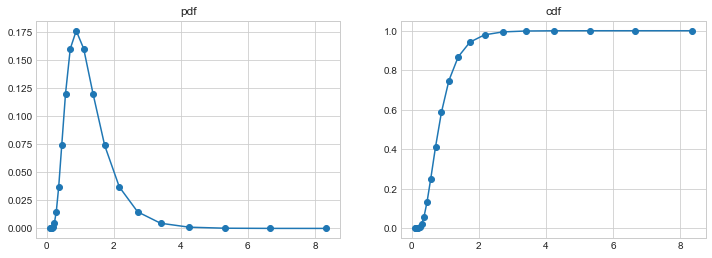

simualated ergodic distribution:
 0.000 [theoretical = 0.000]
 0.000 [theoretical = 0.000]
 0.000 [theoretical = 0.000]
 0.001 [theoretical = 0.001]
 0.005 [theoretical = 0.005]
 0.015 [theoretical = 0.015]
 0.037 [theoretical = 0.037]
 0.074 [theoretical = 0.074]
 0.120 [theoretical = 0.120]
 0.160 [theoretical = 0.160]
 0.176 [theoretical = 0.176]
 0.160 [theoretical = 0.160]
 0.120 [theoretical = 0.120]
 0.074 [theoretical = 0.074]
 0.037 [theoretical = 0.037]
 0.015 [theoretical = 0.015]
 0.005 [theoretical = 0.005]
 0.001 [theoretical = 0.001]
 0.000 [theoretical = 0.000]
 0.000 [theoretical = 0.000]
 0.000 [theoretical = 0.000]


In [14]:
k,y = showcase(grid,trans,ergodic,trans_cumsum,ergodic_cumsum)

In [15]:
print(f'mean(y)      = {np.mean(y):.4f}')
print(f'std(log(y))  = {np.std(np.log(y)):.4f} [sqrt(sigma**2/(1-rho^2)) = {np.sqrt(sigma**2/(1-rho**2)):.3f}]')

mean(y)      = 1.0000
std(log(y))  = 0.5031 [sqrt(sigma**2/(1-rho^2)) = 0.503]
